In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import random
import wget
import zipfile
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from imblearn.under_sampling import RandomUnderSampler

In [2]:
url = "https://storage.googleapis.com/didow-ml-datasets/a-z-handwritten-data.zip"
url2 = "https://storage.googleapis.com/didow-ml-datasets/mnist-letter.zip"
if not os.path.exists('a-z-handwritten-data.zip'):
    filename = wget.download(url)
    filename2 = wget.download(url2)


In [3]:
local_zip = ['mnist-letter.zip', 'a-z-handwritten-data.zip']

for i in local_zip:
    zip_ref = zipfile.ZipFile(i, 'r')

    zip_ref.extractall('./Dataset/')
    zip_ref.close()


In [4]:
az_data = pd.read_csv('Dataset\A_Z Handwritten Data.csv')
emnist_train = pd.read_csv('Dataset\emnist-letters-train.csv')


In [5]:
emnist_train_labels = np.array(emnist_train.iloc[:,0].values) - 1
emnist_train_letters = np.array(emnist_train.iloc[:,1:].values)
az_data_labels = np.array(az_data.iloc[:,0].values)
az_data_letters = np.array(az_data.iloc[:,1:].values)

In [6]:
emnist_train_letters.shape

(88799, 784)

In [7]:
def reshape_normalize(data):
    data = data.astype('float32') / 255.0
    data = data.reshape(-1, 28, 28, 1)
    return data


In [8]:
def reshape_rotate(data):
    data = data.reshape(28, 28)
    data = np.fliplr(data)
    data = np.rot90(data)
    return data


In [9]:
emnist_train_letters = np.apply_along_axis(
    reshape_rotate, 1, emnist_train_letters)


In [10]:
az_data_letters = az_data_letters.reshape(len(az_data_letters), 28, 28)


In [11]:
print(az_data_letters.shape, emnist_train_letters.shape)


(372450, 28, 28) (88799, 28, 28)


In [12]:
letters_data = np.vstack([emnist_train_letters, az_data_letters])
labels_data = np.hstack([emnist_train_labels, az_data_labels])


In [13]:
letters_data.shape

(461249, 28, 28)

In [14]:
undersampler = RandomUnderSampler(sampling_strategy='all')

letters_data = letters_data.reshape(-1, 784)

letters, labels = undersampler.fit_resample(letters_data, labels_data)

In [15]:
letters.shape

(118248, 784)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(letters,
                                                    labels,
                                                    test_size=0.2,
                                                    random_state=42)


In [17]:
x_train = reshape_normalize(x_train)
x_test = reshape_normalize(x_test)


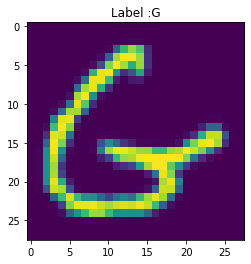

In [18]:
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
           'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


def show_image(image, label):
    image = image.reshape([28, 28])
    plt.title('Label :' + letters[label])
    plt.imshow(image)


n = random.randint(0, len(x_train))
show_image(x_train[n], y_train[n])


In [19]:
y_train = np_utils.to_categorical(y_train, 26)
y_test = np_utils.to_categorical(y_test, 26)


In [20]:
print('training set: ', x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)


training set:  (94598, 28, 28, 1) (94598, 26)
test set:  (23650, 28, 28, 1) (23650, 26)


In [21]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 5, padding='same', activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, 5, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(26, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [22]:
history = model.fit(x_train, y_train, validation_split=0.2,
                    epochs=20, verbose=1, batch_size=256)


Epoch 1/20
296/296 [==============================] - 8s 9ms/step - loss: 0.9425 - accuracy: 0.7235 - val_loss: 0.2744 - val_accuracy: 0.9192
Epoch 2/20
296/296 [==============================] - 3s 9ms/step - loss: 0.3827 - accuracy: 0.8860 - val_loss: 0.2034 - val_accuracy: 0.9390
Epoch 3/20
296/296 [==============================] - 3s 8ms/step - loss: 0.2985 - accuracy: 0.9115 - val_loss: 0.1764 - val_accuracy: 0.9459
Epoch 4/20
296/296 [==============================] - 2s 8ms/step - loss: 0.2571 - accuracy: 0.9225 - val_loss: 0.1577 - val_accuracy: 0.9522
Epoch 5/20
296/296 [==============================] - 2s 8ms/step - loss: 0.2258 - accuracy: 0.9312 - val_loss: 0.1510 - val_accuracy: 0.9549
Epoch 6/20
296/296 [==============================] - 2s 8ms/step - loss: 0.2070 - accuracy: 0.9363 - val_loss: 0.1383 - val_accuracy: 0.9578
Epoch 7/20
296/296 [==============================] - 2s 8ms/step - loss: 0.1902 - accuracy: 0.9411 - val_loss: 0.1334 - val_accuracy: 0.9596
Epoch 

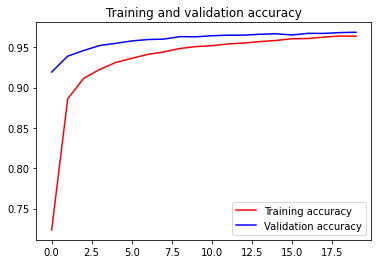

<Figure size 432x288 with 0 Axes>

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()


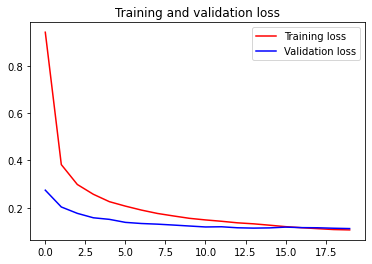

<Figure size 432x288 with 0 Axes>

In [30]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()


In [31]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)

print("Test Loss: ",test_loss)
print("Test Accuracy: ",test_accuracy)

740/740 - 1s - loss: 0.1113 - accuracy: 0.9681 - 1s/epoch - 2ms/step
Test Loss:  0.11130104959011078
Test Accuracy:  0.9680761098861694


In [32]:
list_letters = []
for i in range(len(y_test)):
    ltr = letters[np.argmax(y_test[i])]
    if ltr == 'K':
        list_letters.append(i)


1/1 [==============================] - 0s 12ms/step


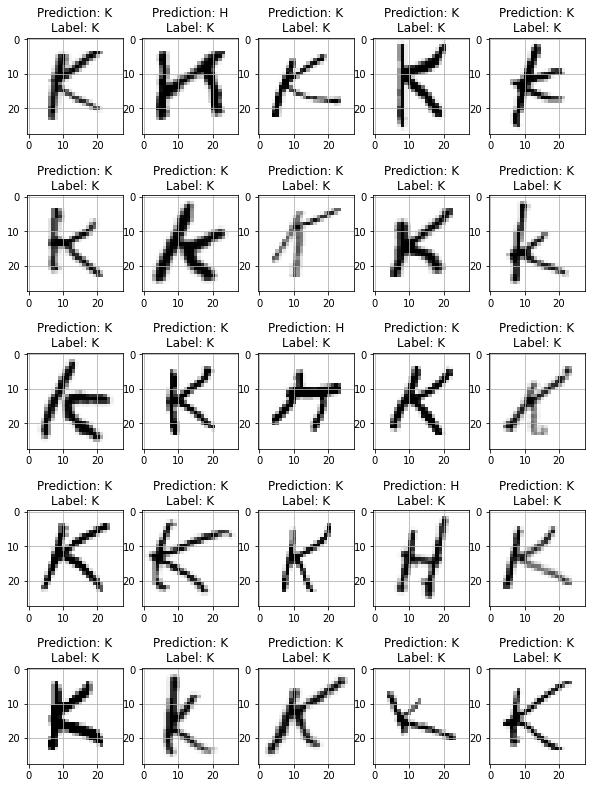

In [33]:
fig, axes = plt.subplots(5, 5, figsize=(10, 14))
axes = axes.flatten()

for i, ax in enumerate(axes):
    n = list_letters[i]
    img = np.reshape(x_test[n], (28, 28))
    # img = np.fliplr(img)
    # img = np.rot90(img)
    ax.imshow(img, cmap="Greys")
    # reshapng it for passing into model for prediction
    img_final = np.reshape(img, (1, 28, 28, 1))
    pred = letters[np.argmax(model.predict(img_final))]
    ax.set_title("Prediction: {}\nLabel: {}".format(
        pred, letters[np.argmax(y_test[n])]))
    ax.grid()


In [35]:
model_version = '5'
model_name = 'combine'
save_path = "./Model/{}/{}".format(model_name, model_version)
model.save(save_path)


INFO:tensorflow:Assets written to: ./Model/combine/5\assets


INFO:tensorflow:Assets written to: ./Model/combine/5\assets
